MBAN 6120 U - Assignment 3 - Image Classification

- Name: Mahin Bindra
- Student Id: 220089330

In [3]:
# import relevant libraries
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [4]:
import tensorflow_datasets as tfds

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
# load the dataset
(train, test) = tfds.load('stanford_dogs', split = ['train', 'test'], as_supervised=True)

In [6]:
train

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

In [7]:
test

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

In [8]:
# check size of images
for image, _ in train.take(10):
     print("Image shape:", image.shape)

Image shape: (500, 333, 3)
Image shape: (367, 400, 3)
Image shape: (500, 375, 3)
Image shape: (321, 450, 3)
Image shape: (333, 500, 3)
Image shape: (375, 500, 3)
Image shape: (500, 470, 3)
Image shape: (207, 200, 3)
Image shape: (375, 500, 3)
Image shape: (500, 333, 3)


After assessing the dataset's structure and description, we observed that the height and width of the images are not fixed, and the dataset contains elements with varying dimensions. Hence, it is essential to normalize and resize the picture to avoid variability.

## 1. Data Preprocessing

In [9]:
# normalize and resize the images
def normalize(image, label):
    normalized_image = tf.image.resize(image, [224, 224])
    normalized_image /= 255
    return normalized_image, label

In [10]:
train = train.map(normalize)
test = test.map(normalize)

We now normalized and resized the images to ensure that each image is processed properly. This standardizes the input data and helps the model lean more effectively.

In [11]:
def load_dataset(train_size, test_size):
    train_images, train_labels = next(iter(train.batch(train_size)))
    test_images, test_labels = next(iter(test.batch(test_size)))

    X_train = train_images.numpy()
    X_test = test_images.numpy()

    y_train = train_labels.numpy()
    y_test = test_labels.numpy()

    return X_train, X_test, y_train, y_test

We did not perform standard scaling as it mainly involves data transformation, so it has a mean of zero and a standard deviation of one. But since, in this image data, pixel values are consistent across all images, a CNN model can handle the 0 to 255 range (for each colour channel in RGB images) without the need for standard scaling to a zero mean and unit variance; the need for traditional scaling was not as pronounced for this dataset.

In [12]:
# load the dataset into train and test
X_train, X_test, y_train, y_test = load_dataset(10000, 2000)

In [13]:
from tensorflow.keras import layers

## 2. Model Building

In [14]:
# initial simple model
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(), 
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(120, activation='softmax')
])

We started by building a simple Convolutional Neural Network (CNN) model consisting of three convolutional layers with 32, 64, and 128 filters, respectively. Each is followed by a 'relu' activation function for non-linearity and MaxPooling2D for downscaling the feature maps. A Flatten layer was used to convert 2D feature maps into a 1D vector for dense layers. A fully connected layer with 512 neurons was followed by the output layer with 120 neurons (representing the number of classes) and a 'softmax' activation function for multi-class classification. Initially, we did not include a dropout or batch normalization layer.

In [ ]:
# compile the model
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

We then compiled the model using the 'SGD' optimizer and the 'Sparse Categorical Crossentropy' loss function. We chose SGD as a starting optimizer, given its simplicity, effectiveness, and the valuable insights it can provide during the initial phases of model training. It updates the model's weights using a single training example at each iteration, which makes the algorithm easy to understand and implement. We will also try Adagrad for this model. 

Since we used the 'Sparse Categorical Crossentropy' loss function for compiling the model, One-hot encoding was not used for labels as the loss function (sparse_categorical_crossentropy) can directly handle integer labels.


In [ ]:
# fit the model
history = model.fit(X_train, y_train, 
                    epochs=10, 
                    validation_data=(X_test, y_test),
                    batch_size=32)

Epoch 1/10
313/313 [==============================] - 332s 1s/step - loss: 4.7847 - accuracy: 0.0101 - val_loss: 4.7669 - val_accuracy: 0.0175
Epoch 2/10
313/313 [==============================] - 322s 1s/step - loss: 4.7335 - accuracy: 0.0171 - val_loss: 4.6817 - val_accuracy: 0.0245
Epoch 3/10
313/313 [==============================] - 328s 1s/step - loss: 4.6128 - accuracy: 0.0262 - val_loss: 4.5899 - val_accuracy: 0.0230
Epoch 4/10
313/313 [==============================] - 455s 1s/step - loss: 4.4674 - accuracy: 0.0428 - val_loss: 4.5237 - val_accuracy: 0.0440
Epoch 5/10
313/313 [==============================] - 394s 1s/step - loss: 4.3115 - accuracy: 0.0603 - val_loss: 4.4332 - val_accuracy: 0.0440
Epoch 6/10
313/313 [==============================] - 360s 1s/step - loss: 4.1494 - accuracy: 0.0817 - val_loss: 4.5133 - val_accuracy: 0.0380
Epoch 7/10
313/313 [==============================] - 410s 1s/step - loss: 3.9619 - accuracy: 0.1131 - val_loss: 4.4874 - val_accuracy: 0.0455

In [20]:
# compile the model
model.compile(optimizer='adagrad', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [21]:
# fit the model
history = model.fit(X_train, y_train, 
                    epochs=10, 
                    validation_data=(X_test, y_test),
                    batch_size=32)

Epoch 1/10
313/313 [==============================] - 425s 1s/step - loss: 4.7879 - accuracy: 0.0087 - val_loss: 4.7772 - val_accuracy: 0.0100
Epoch 2/10
313/313 [==============================] - 427s 1s/step - loss: 4.7742 - accuracy: 0.0150 - val_loss: 4.7652 - val_accuracy: 0.0160
Epoch 3/10
313/313 [==============================] - 429s 1s/step - loss: 4.7524 - accuracy: 0.0157 - val_loss: 4.7416 - val_accuracy: 0.0180
Epoch 4/10
313/313 [==============================] - 411s 1s/step - loss: 4.7082 - accuracy: 0.0192 - val_loss: 4.7022 - val_accuracy: 0.0135
Epoch 5/10
313/313 [==============================] - 430s 1s/step - loss: 4.6493 - accuracy: 0.0260 - val_loss: 4.6580 - val_accuracy: 0.0170
Epoch 6/10
313/313 [==============================] - 427s 1s/step - loss: 4.6034 - accuracy: 0.0275 - val_loss: 4.6161 - val_accuracy: 0.0225
Epoch 7/10
313/313 [==============================] - 431s 1s/step - loss: 4.5531 - accuracy: 0.0349 - val_loss: 4.6064 - val_accuracy: 0.0290

KeyboardInterrupt: 

We also trained the same model with Adagrad optimizer to compare results and assess which optimizer is relatively better. Based on the results, it is evident that SGD optimizer yields better results.

In [16]:
# initial simple model 2
simple_model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(48, (3,3), activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(96, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(192, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(), 
    tf.keras.layers.Dense(120, activation='softmax')
])

We built another simple Convolutional Neural Network (CNN) model consisting of three convolutional layers with 48, 96, and 192 filters, respectively. Each is followed by a 'relu' activation function for non-linearity and MaxPooling2D for downscaling the feature maps. A Flatten layer was used to convert 2D feature maps into a 1D vector for dense layers. An output layer with 120 neurons (representing the number of classes) and a 'softmax' activation function for multi-class classification was used. Initially, we did not include a dropout or batch normalization layer.

In [18]:
# compile the model
simple_model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [19]:
# fit the model
simple_history = simple_model.fit(X_train, y_train, 
                    epochs=10, 
                    validation_data=(X_test, y_test),
                    batch_size=32)

Epoch 1/10
313/313 [==============================] - 640s 2s/step - loss: 4.7871 - accuracy: 0.0102 - val_loss: 4.7714 - val_accuracy: 0.0130
Epoch 2/10
313/313 [==============================] - 643s 2s/step - loss: 4.7329 - accuracy: 0.0183 - val_loss: 4.6800 - val_accuracy: 0.0230
Epoch 3/10
313/313 [==============================] - 591s 2s/step - loss: 4.5824 - accuracy: 0.0313 - val_loss: 4.5585 - val_accuracy: 0.0380
Epoch 4/10
313/313 [==============================] - 645s 2s/step - loss: 4.4135 - accuracy: 0.0501 - val_loss: 4.4631 - val_accuracy: 0.0435
Epoch 5/10
313/313 [==============================] - 578s 2s/step - loss: 4.2074 - accuracy: 0.0766 - val_loss: 4.4798 - val_accuracy: 0.0375
Epoch 6/10
313/313 [==============================] - 636s 2s/step - loss: 3.9681 - accuracy: 0.1196 - val_loss: 4.4981 - val_accuracy: 0.0585
Epoch 7/10
313/313 [==============================] - 633s 2s/step - loss: 3.5740 - accuracy: 0.1789 - val_loss: 4.5798 - val_accuracy: 0.0390

In [ ]:
# # compile the model
# simple_model.compile(optimizer='adagrad', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# simple_history = simple_model.fit(X_train, y_train, 
#                     epochs=10, 
#                     validation_data=(X_test, y_test),
#                     batch_size=32)

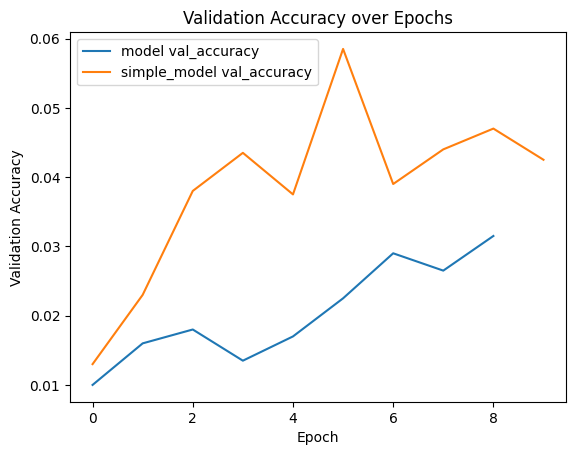

In [22]:
# plotting epoch vs. validation accuracy graph for simple models
import matplotlib.pyplot as plt

models = [model, simple_model]
model_names = ['model', 'simple_model']

for model, name in zip(models, model_names):
    if 'val_accuracy' in model.history.history:
        plt.plot(model.history.history['val_accuracy'], label=f'{name} val_accuracy')

plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')
plt.title('Validation Accuracy over Epochs')
plt.show()

Looking at the results, we can conclude that although the model showed increasing accuracy on the training set, the accuracy is not great. Also, the validation accuracy of the models is dramatically low. 

The model's lower training accuracy suggests it struggles to learn effectively from the dataset. This could be attributed to the inherent complexity of the image classification dataset with many classes, the possibility that the model architecture needs more depth or capacity to capture intricate patterns in the data, or suboptimal feature extraction by the convolutional layers. Additionally, the choice of the optimizer (SGD / Adagrad) and its learning rate settings, along with the number of epochs used for training, might not be ideal for this specific task, leading to insufficient convergence of the model. Hence, we will add additional layers to optimize the model, such as dropout batch normalization, and try different optimizers that yield better results.

Compared to the training accuracy, the even lower validation accuracy indicates overfitting. This discrepancy could be due to inadequate regularization methods (like dropout) or the model being trained too long on a limited dataset. Also, since the dataset is large and highly complex, the model cannot generalize the images rather than only memorizing, hence the poor validation accuracy.

Overall, the simple model 2 in combination with SGD optimizer performs relatively better compared to others. However, the first model with SGD optimizer had a better validation accuracy. Hence, we will optimize this first simple model by experiementing with different layers and optimizers.

## 3. Model Training and Optimization

In [ ]:
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import LearningRateScheduler, EarlyStopping, ModelCheckpoint
from tensorflow.keras import regularizers

In [ ]:
# optimized model
updated_model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(224, 224, 3)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(120, activation='softmax')
])

In [ ]:
# compile optimized model
updated_model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
import os
from tensorflow.keras.callbacks import ModelCheckpoint

In [ ]:
home_dir = os.path.expanduser("~")
model_path = os.path.join(home_dir, 'best_model.h5')

In [ ]:
# implement callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=3)
checkpoint = ModelCheckpoint(model_path, save_best_only=True, monitor='val_accuracy', mode='max')

We optimized the initial model by implementing severa steps such as -
- Introduced **Batch Normalization** after each convolutional layer to stabilize learning and speed up the training process.
- Implemented **Dropout layers** with a rate of 0.5 after dense layers to reduce overfitting by randomly dropping neurons during training.
- Switched to the **Adam optimizer**. Unlike SGD, Adam adapts the learning rate during training, which can lead to faster convergence and improved handling of the vanishing gradient problem. This change was crucial in addressing the model's previously limited ability to learn from the data efficiently.
- Introduced **Early Stopping**, which monitored the validation loss with a patience of 3 epochs to prevent overtraining.
- Implemented **Model Checkpointing**, which saved the best model based on validation accuracy to ensure the retention of the most effective version of the model during training.

In [ ]:
# fit the updated model
updated_history = updated_model.fit(
    X_train, y_train,
    epochs=10,
    validation_data=(X_test, y_test),
    callbacks=[early_stopping, checkpoint],
    batch_size=32
)

Epoch 1/10
313/313 [==============================] - ETA: 0s - loss: 5.3997 - accuracy: 0.0220

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


313/313 [==============================] - 548s 2s/step - loss: 5.3997 - accuracy: 0.0220 - val_loss: 5.6780 - val_accuracy: 0.0210
Epoch 2/10
313/313 [==============================] - 489s 2s/step - loss: 4.4993 - accuracy: 0.0736 - val_loss: 4.5901 - val_accuracy: 0.0550
Epoch 3/10
313/313 [==============================] - 486s 2s/step - loss: 3.6298 - accuracy: 0.1713 - val_loss: 4.4745 - val_accuracy: 0.0720
Epoch 4/10
313/313 [==============================] - 579s 2s/step - loss: 2.2695 - accuracy: 0.4553 - val_loss: 4.5330 - val_accuracy: 0.0885
Epoch 5/10
313/313 [==============================] - 571s 2s/step - loss: 0.8707 - accuracy: 0.8174 - val_loss: 4.6208 - val_accuracy: 0.0920
Epoch 6/10
313/313 [==============================] - 594s 2s/step - loss: 0.2721 - accuracy: 0.9576 - val_loss: 4.5138 - val_accuracy: 0.1005
Epoch 7/10
313/313 [==============================] - 558s 2s/step - loss: 0.1313 - accuracy: 0.9832 - val_loss: 4.4672 - val_accuracy: 0.1000
Epoch 8/10

Looking at the results, we can confirm that the model showed significant improvement in training accuracy, indicating better learning from the data. However, despite improvements validation accuracy remained significantly lower than training accuracy, indicating persistent overfitting issues. While dropout and batch normalization helped, overfitting remains a challenge, possibly due to the complexity of the dataset and the use of basic / less advanced models relative to the diversity, size and amount of training data.

## 4. Evaluation

In [ ]:
# assess train and test accuracy
_, train_acc = updated_model.evaluate(X_train, y_train, verbose=0)
_, test_acc = updated_model.evaluate(X_test, y_test, verbose=0)
print('Train Acc:', train_acc, 'Test Acc:', test_acc)

Train Acc: 0.9987999796867371 Test Acc: 0.09149999916553497


In [ ]:
test_loss, test_accuracy = updated_model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

63/63 [==============================] - 18s 274ms/step - loss: 4.5686 - accuracy: 0.0915
Test Loss: 4.568573951721191
Test Accuracy: 0.09149999916553497


63/63 [==============================] - 29s 454ms/step


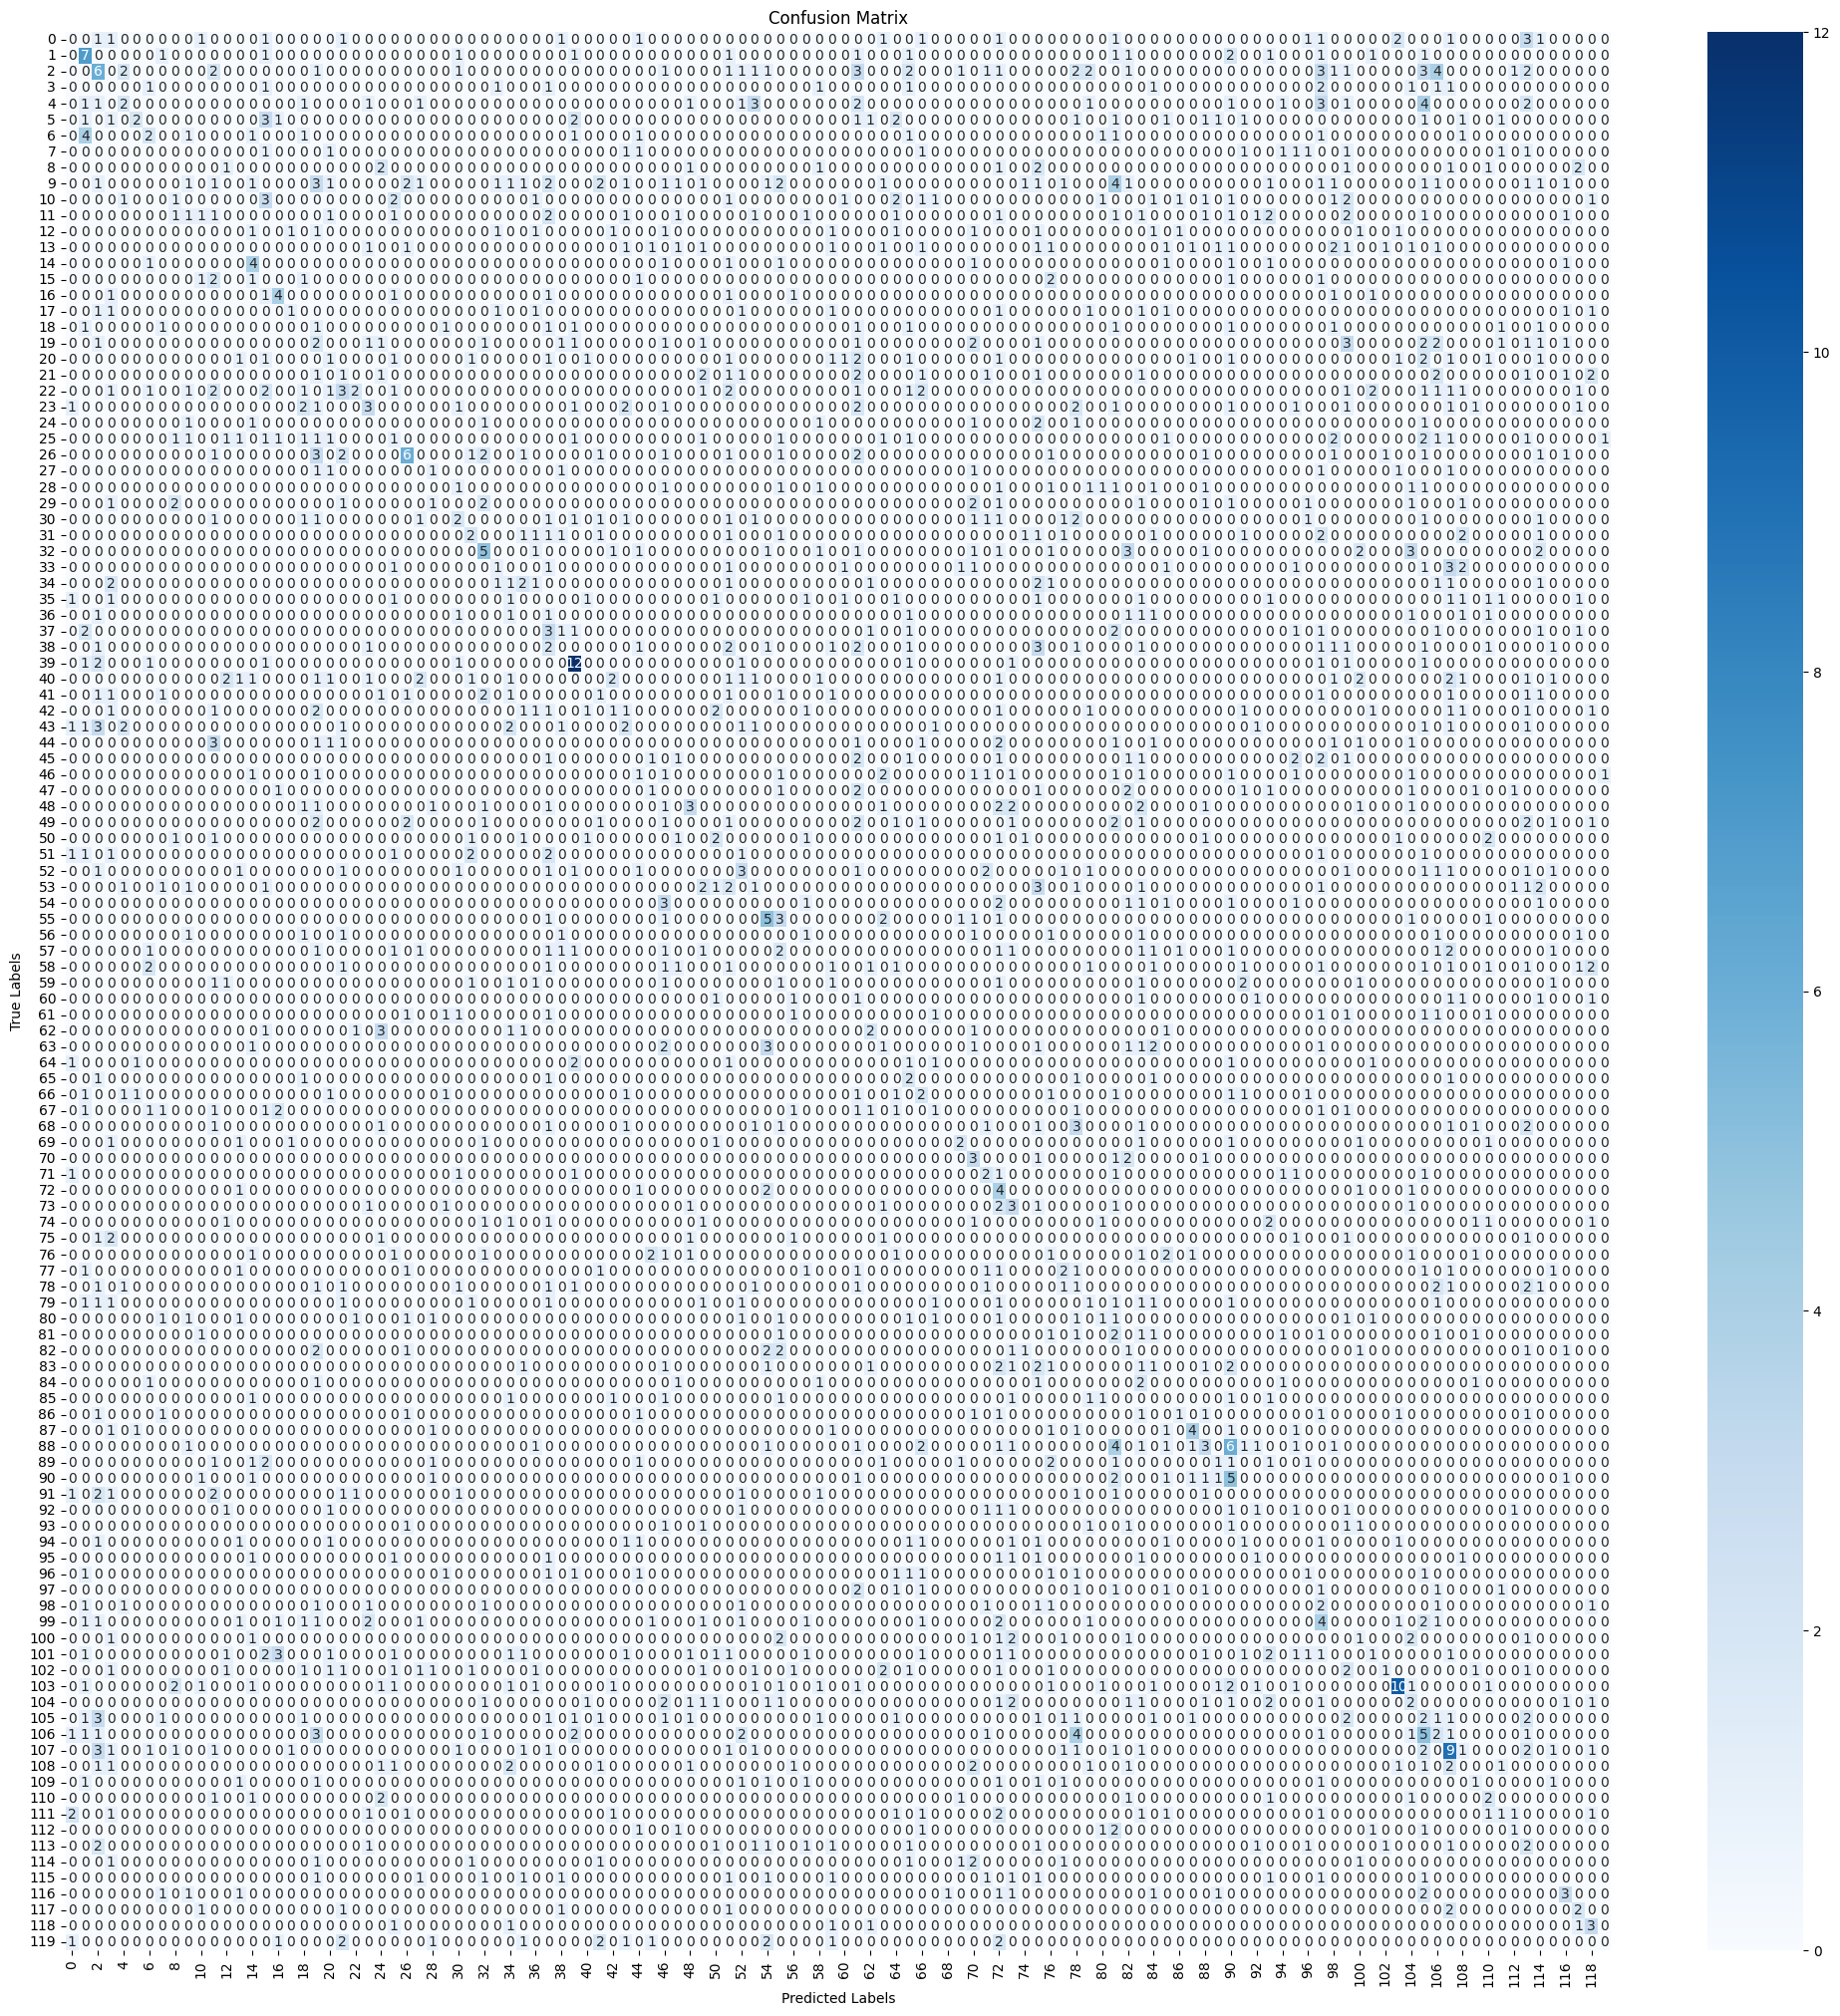

In [ ]:
# visualize reults using confusino matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

y_pred = updated_model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

y_true = y_test  

cm = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(25, 25))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
y_pred = updated_model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

y_true = y_test

63/63 [==============================] - 23s 339ms/step


In [ ]:
# generate classification report to assess performance of each class
from sklearn.metrics import classification_report

class_report = classification_report(y_true, y_pred_classes)

print(class_report)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        20
           1       0.23      0.32      0.26        22
           2       0.15      0.13      0.14        45
           3       0.00      0.00      0.00        12
           4       0.18      0.07      0.11        27
           5       0.40      0.09      0.14        23
           6       0.17      0.12      0.14        16
           7       0.00      0.00      0.00        12
           8       0.00      0.00      0.00        13
           9       0.09      0.02      0.04        42
          10       0.00      0.00      0.00        23
          11       0.04      0.04      0.04        25
          12       0.00      0.00      0.00        15
          13       0.00      0.00      0.00        21
          14       0.20      0.31      0.24        13
          15       0.00      0.00      0.00        10
          16       0.29      0.33      0.31        12
          17       0.25    

We evaluated the results and showcased them using a confusion matrix, however due to the presence of 120 classes the confusion matrix is extremely large and difficult to read. Hence, we generated a classification report to assess aggregate measures like accuracy, precision, recall, and F1-score

## 5. Write-up

### 5.1 Modelling process, architecture choices and results evaluation

Initially, the objective was to create a CNN for classifying images across many classes. The model's architecture featured three convolutional layers with increasing filters (32, 64, 128), each followed by max pooling, a flattening layer, and two dense layers, ending in a 120-neuron softmax output layer. We also created model with different number of filters (48, 96, 192) filers and only one dense layer. The training of both models utilized Stochastic Gradient Descent (SGD) / Adagrad as the optimizer and sparse categorical cross entropy for the loss function. Overall, the first simple model with the SGD optimizer showcased better validation acuracy. However, the model confronted several issues, reflected in low overall training accuracy and even lower validation accuracy. More notably, a significant disparity between training and validation accuracy suggested pronounced overfitting. The lack of advanced regularization techniques like dropout or batch normalization contributed to this, alongside potential challenges in model capacity and feature extraction efficacy.

In response to the initial challenges, we optimized the model significantly. The optimization technique included the integration of batch normalization after each convolutional layer and the introducing of dropout layers to mitigate overfitting. We switched the optimizer to Adam, known for its adaptive learning rate, which addressed the limitations of SGD and Adagrad, improving the model's learning efficiency. Implemented additional training strategies like early stopping (with patience of 3 epochs) and model checkpointing to prevent overtraining and ensure retention of the best-performing iteration. These optimizations marked improvements in training accuracy, demonstrating more effective learning. However, the gap between training and validation accuracy, although reduced, remained a concern, indicating ongoing overfitting issues and complexity of data. This highlighted the need for further refinement in balancing model complexity, enhancing data diversity, and employing more robust regularization methods.

### 5.2 Challenges faced and their overcoming methods

Throughout model development and result evaluation, we faced multiple challenges, such as -

- **1. Challenge:** The dataset provided was extremely large and complex, and while loading the whole dataset, the system kept crashing. We tried using both Google Colab and VSCode to load the dataset. However, reading the entire dataset on Google Colab was a big challenge, given its limited RAM availability. While on VSCode, we could load the whole dataset, the model processing became extremely slow, resulting in the need for high computational power.
  - Mitigation Strategy: To solve this problem, we tried loading a dataset sample. In Google Colab, we could not load more than 1500 (train_size) and 500 (test_size), as the system kept crashing for any value beyond that. Luckily, in vs code, we were able to load a relatively larger sample hence, we used that for our assignment

- **2. Challenge:** Despite optimization and introducing various layers of advanced optimizers, we experience significantly low validation accuracy. This indicated that although the model worked well while training, it could not generalize images. This is also attributed towards the large and complex dataset and the inability of these basic models to process these images. 
  - Mitigation Strategy: We tried implementing various strategies, but the model continued to overfit, as evidenced by the training and validation accuracy gap. The complexity of the task relative to the diversity of the training data impacted the model's ability to generalize, warranting the need for a more advanced model.

- **3. Challenge:** Visualization of performance through confusion matrix. Since the dataset contains 120 classes, the confusion matrix created was vast and complex to interpret.
  - Mitigation Strategy: To account for this, we created a classification report to focus on aggregate metrics like accuracy, precision, f1-score and recall as it can be more information. Hence, we used the 'classification_report' from sci-kit-learn to provide detailed insights into the performance for each class.

- **4. Challenge:** Limited computational resources are available to experiment and play around with simple and optimized models by adjusting several layers and fine-tuning parameters (optimizer, learning rate, etc.) to decide which model works the best and optimize that.
  - Mitigation Strategy: Tried a few initial simple models with a couple of optimizers SGD and Adagrad in this case and, based on results, hypothesized which model and optimizer combination might work better and improved that model by adjusting and adding layers and implementing callbacks like Early Stopping and Model Checkpoints.

### 5.3 Insights on what worked well and what didn't

**What worked well**

- **Model architecture enhancements** 
  - The integration of batch normalization after each convolutional layer proved effective in stabilizing the learning process and speeding up convergence.
  - The addition of dropout layers helped mitigate overfitting to some extent by reducing the model's tendency to rely on specific neurons.
  - Switching from SGD / Adagrad to Adam was a significant improvement. Adam's adaptive learning rate addressed the slow convergence issue inherent in SGD, leading to faster and more efficient training.
  - Early stopping effectively prevented overtraining by halting the training process once the model ceased to show improvement in validation loss.
  - Model checkpointing was crucial in retaining the best version of the model throughout the training epochs.

- **Handling large and complex datasets**
  - Managing the large and complex dataset by loading a manageable subset of the data helped in practical model training and experimentation within the available computational constraints.

- **Image normalization and resizing**
  - Resizing images to a uniform dimension (224x224) was crucial, given the inconsistency in sizes, as it made the model training more consistent and efficient, as all input images had uniform dimensions and pixel value ranges, facilitating the learning process.


**What didn't work well**

- **Persistent overfitting**
  - Despite improvements, the model continued to overfit, as indicated by the significant gap between training and validation accuracy. This suggests that the applied regularization techniques were insufficient for the complexity of the dataset.

- **Generalization to unseen data**
  - The model struggled to generalize effectively, evidenced by the low validation accuracy. This could be due to the limited diversity in the training subset or the inherent complexity of the dataset with visually similar classes.

- **Limitation to computation resources**
  - Computational constraints limited the ability to train on the entire dataset or experiment with more complex or computationally demanding models, which might have yielded better results.

- **Difficulty in performance visualization**
  - The large number of classes (120) made the confusion matrix too complex to interpret easily, posing challenges in evaluating the model's performance on individual classes.